# Student Perfomance Indicatior

Problem Statement

- This project undersrtands how the students performance (test score) is afffected by other variable sucha as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course 

Import Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There is no missing values in the dataset

Check duplicates

In [7]:
df.duplicated().sum()

0

- There is no duplicate value in dataset

Check data type

In [8]:
# Check null and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check ststistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:
- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard devation are also close - between 14.6 and 15.19
- While there is minimum score 0 for maths, for writing minimum is much higher = 10 and for reading much higher = 17

Exploring Data

In [10]:
print("Categories in 'gender' variable: ",end = " ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']


print('We have {} numerical features:{}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))



We have 3 numerical features:['math score', 'reading score', 'writing score']
We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for "Total Score" and "Average"

In [21]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()

print('Number of students who got full marks in reading: ', reading_full)
print('Number of students who got full marks in writing: ', writing_full)
print('Number of students who got full marks in math: ', math_full)

Number of students who got full marks in reading:  17
Number of students who got full marks in writing:  14
Number of students who got full marks in math:  7


In [23]:
reading_less_20 = df[df['reading score']<=20]['average_score'].count()
writing_less_20 = df[df['writing score']<=20]['average_score'].count()
math_less_20 = df[df['math score']<=20]['average_score'].count()

print('Number of students who got less than 20 marks in reading: ', reading_less_20)
print('Number of students who got less than 20 marks in writing: ', writing_less_20)
print('Number of students who got less than 20 marks in math: ', math_less_20)

Number of students who got less than 20 marks in reading:  1
Number of students who got less than 20 marks in writing:  3
Number of students who got less than 20 marks in math:  4


Insights

- We can understand that students has performed worst in Maths
- Best performance is in reading section

Exploring Data (Visualization)

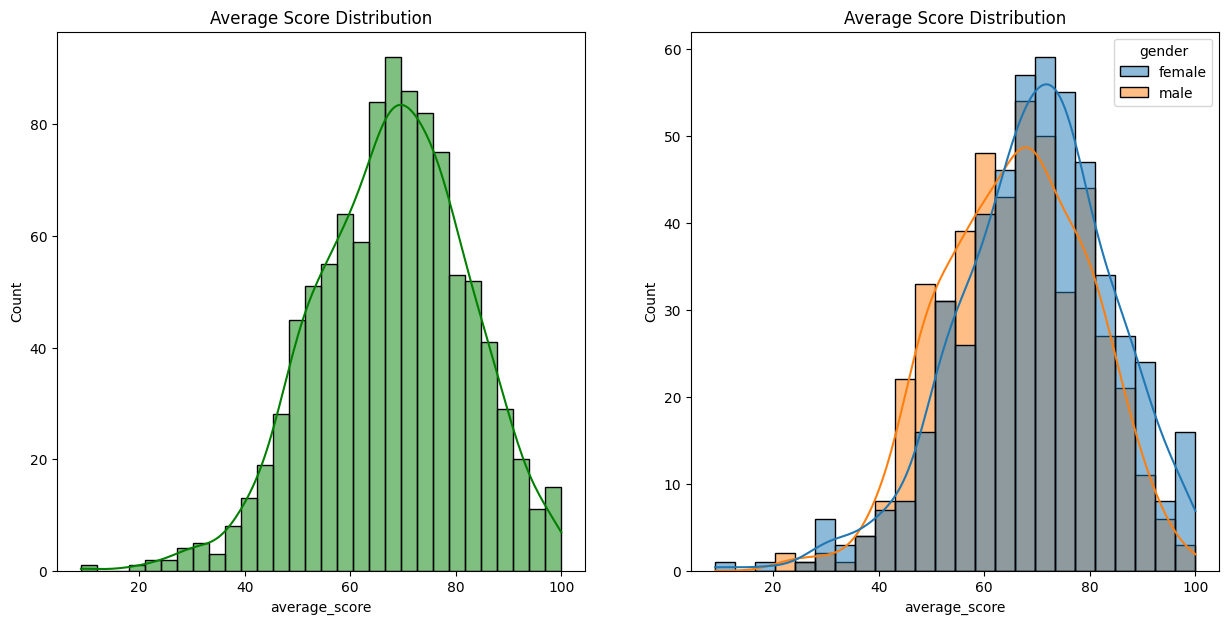

In [24]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.title('Average Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='average_score',hue='gender',kde=True)
plt.title('Average Score Distribution')
plt.show()

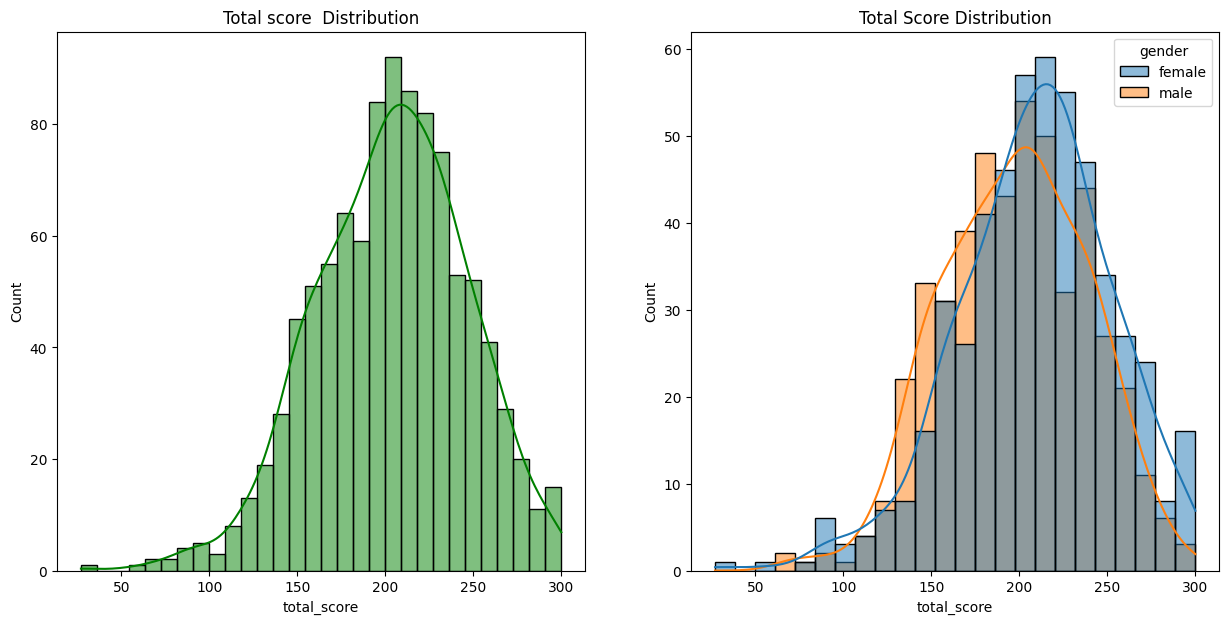

In [25]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.title('Total score  Distribution')
plt.subplot(122)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.title('Total Score Distribution')
plt.show()